In [1]:
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
from utils import box_plot

In [2]:
ESS_HUG       = load("experiment11b/ESS_HUG.npy")
ESS_LOGPI_HUG = load("experiment11b/ESS_LOGPI_HUG.npy")
A_HUG         = load("experiment11b/A_HUG.npy")
RMSE_HUG      = load("experiment11b/RMSE_HUG.npy")

ESS_THUG       = load("experiment11b/ESS_THUG.npy")
ESS_LOGPI_THUG = load("experiment11b/ESS_LOGPI_THUG.npy")
A_THUG         = load("experiment11b/A_THUG.npy")
RMSE_THUG      = load("experiment11b/RMSE_THUG.npy")

EPSILONS       = load("experiment11b/EPSILONS.npy")
ALPHAS         = load("experiment11b/ALPHAS.npy")

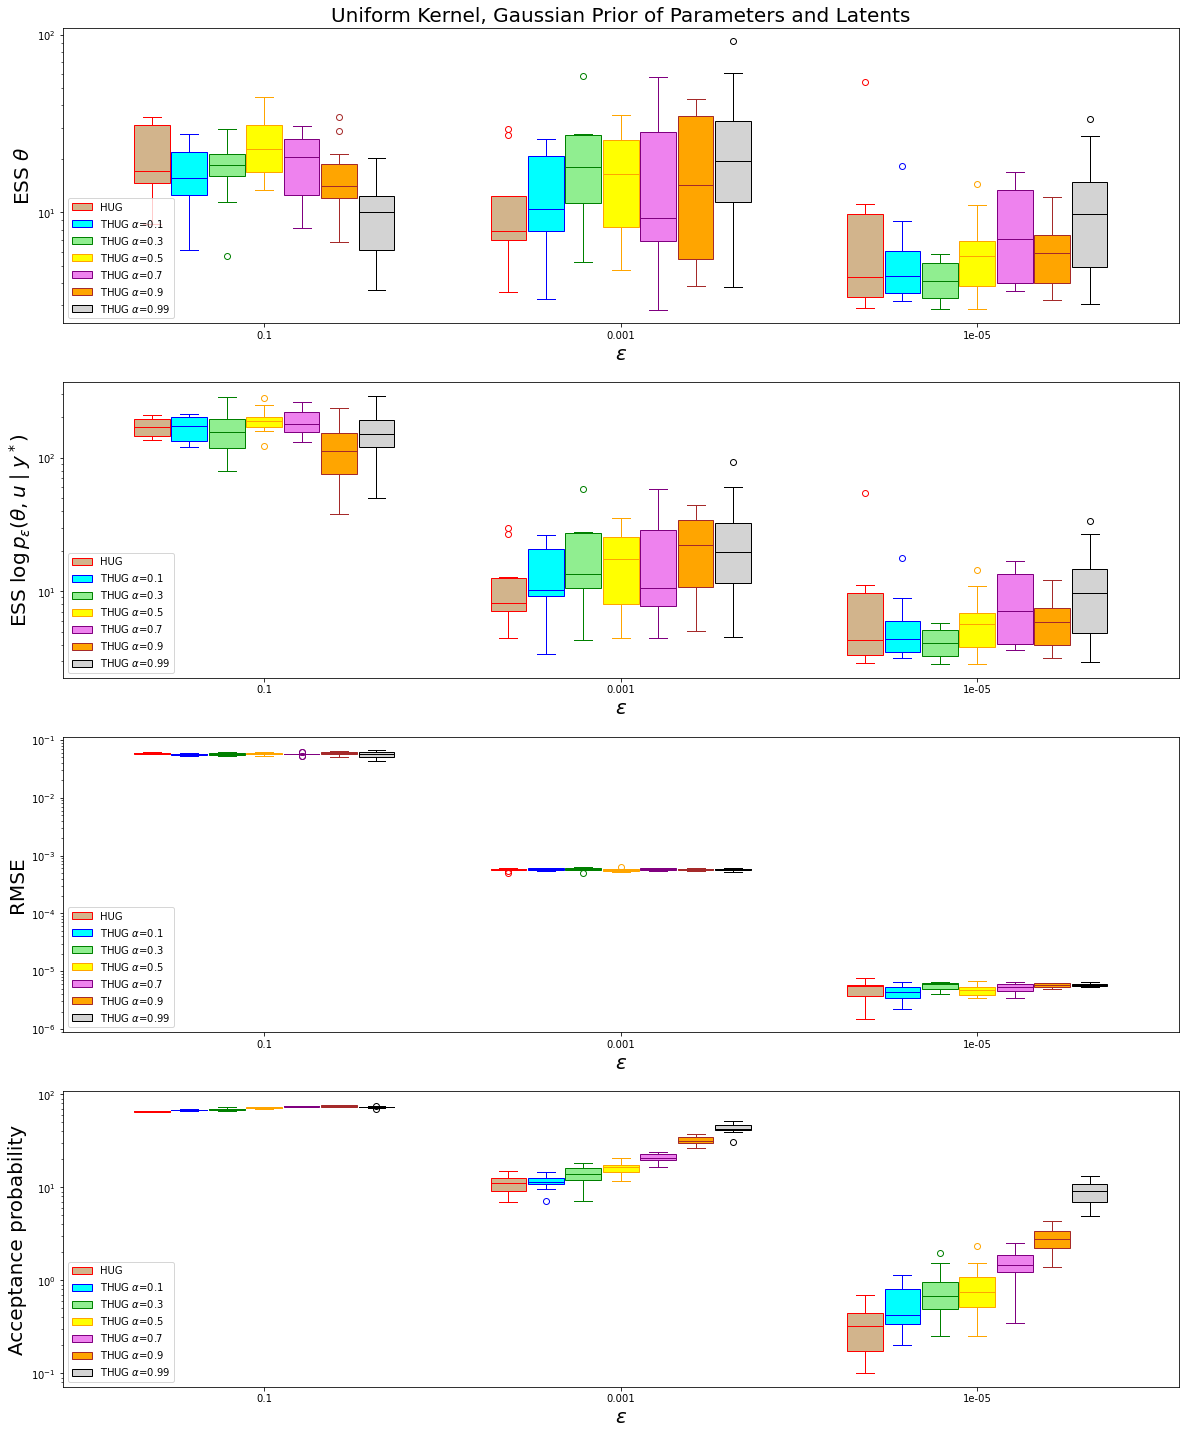

In [3]:
columns = EPSILONS
width = 0.21
n_alphas = len(ALPHAS)
ticks = np.arange(start=1, stop=len(EPSILONS)*2, step=2)
n_boxes = n_alphas + 1
disp = np.linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks
colors1 = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'black']
colors2 = ['tan', 'cyan', 'lightgreen', 'yellow', 'violet', 'orange', 'lightgray']

fig, ax = plt.subplots(nrows=4, figsize=(20, 25))
# Univariate ESS for \theta chain
bp1 = box_plot(ax[0], ESS_HUG.T.tolist(), 'red', 'tan', positions[0])
bps = []
for i in range(len(ALPHAS)):
    bps.append(box_plot(ax[0], ESS_THUG[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1["boxes"][0]] + [bp["boxes"][0] for bp in bps]
labels = ['HUG'] + ['THUG $\\alpha$={}'.format(alpha) for alpha in ALPHAS]
ax[0].legend(
    handles, 
    labels, 
    loc='lower left')
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(columns)
ax[0].set_xlabel("$\\epsilon$", fontsize=20)
ax[0].set_ylabel("ESS $\\theta$", fontsize=20)
ax[0].semilogy()

# ESS for joint ABC posterior
bp1_joint = box_plot(ax[1], ESS_LOGPI_HUG.T.tolist(), 'red', 'tan', positions[0])
bps_joint = []
for i in range(len(ALPHAS)):
    bps_joint.append(box_plot(ax[1], ESS_LOGPI_THUG[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1_joint["boxes"][0]] + [bp["boxes"][0] for bp in bps_joint]
labels = ['HUG'] + ['THUG $\\alpha$={}'.format(alpha) for alpha in ALPHAS]
ax[1].legend(
    handles, 
    labels, 
    loc='lower left')
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(columns)
ax[1].set_xlabel("$\\epsilon$", fontsize=20)
ax[1].set_ylabel("ESS $\log p_{\\epsilon}(\\theta, u \mid y^*)$", fontsize=20)
ax[1].semilogy()

# RMSE 
bp1_rmse = box_plot(ax[2], RMSE_HUG.T.tolist(), 'red', 'tan', positions[0])
bps_rmse = []
for i in range(len(ALPHAS)):
    bps_rmse.append(box_plot(ax[2], RMSE_THUG[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1_rmse["boxes"][0]] + [bp["boxes"][0] for bp in bps_rmse]
labels = ['HUG'] + ['THUG $\\alpha$={}'.format(alpha) for alpha in ALPHAS]
ax[2].legend(
    handles, 
    labels, 
    loc='lower left')
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(columns)
ax[2].set_xlabel("$\\epsilon$", fontsize=20)
ax[2].set_ylabel("RMSE", fontsize=20)
ax[2].semilogy()

# ACCEPTANCE PROBABILITY 
bp1_a = box_plot(ax[3], A_HUG.T.tolist(), 'red', 'tan', positions[0])
bps_a = []
for i in range(len(ALPHAS)):
    bps_a.append(box_plot(ax[3], A_THUG[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1_a["boxes"][0]] + [bp["boxes"][0] for bp in bps_a]
labels = ['HUG'] + ['THUG $\\alpha$={}'.format(alpha) for alpha in ALPHAS]
ax[3].legend(
    handles, 
    labels, 
    loc='lower left')
ax[3].set_xticks(ticks)
ax[3].set_xticklabels(columns)
ax[3].set_xlabel("$\\epsilon$", fontsize=20)
ax[3].set_ylabel("Acceptance probability", fontsize=20)
ax[3].semilogy()

ax[0].set_title("Uniform Kernel, Gaussian Prior of Parameters and Latents", fontsize=20)
plt.show()

In [ ]:
ESS_LOGPI_THUG[:, 1, ]